# **[EXPORT]**  
**┗ 기본편🎉**
---

## **🔒 [제조] 문제**
---
* **제시된 제조 데이터(Time Series, 시계열)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/SIMON/09.1%/면접과제01")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/SIMON/09.1%/면접과제01'

In [1]:
import pandas as pd
df = pd.read_csv('example_1.csv', sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [3]:
# Q1
print(f"전체 데이터의 Row 수는 {df.shape[0]}개 이고 Column 수는 {df.shape[1]}개 입니다.")

전체 데이터의 Row 수는 1063개 이고 Column 수는 11개 입니다.


In [4]:
# Q2
print(df.dtypes)

datetime                object
Accelerometer1RMS      float64
Accelerometer2RMS      float64
Current                float64
Pressure               float64
Temperature            float64
Thermocouple           float64
Voltage                float64
Volume Flow RateRMS    float64
anomaly                float64
changepoint            float64
dtype: object


In [5]:
# Q2
for c in df.columns:
    print(f'{c} Column의 데이터 타입은 {df[c].dtype}입니다.')

datetime Column의 데이터 타입은 object입니다.
Accelerometer1RMS Column의 데이터 타입은 float64입니다.
Accelerometer2RMS Column의 데이터 타입은 float64입니다.
Current Column의 데이터 타입은 float64입니다.
Pressure Column의 데이터 타입은 float64입니다.
Temperature Column의 데이터 타입은 float64입니다.
Thermocouple Column의 데이터 타입은 float64입니다.
Voltage Column의 데이터 타입은 float64입니다.
Volume Flow RateRMS Column의 데이터 타입은 float64입니다.
anomaly Column의 데이터 타입은 float64입니다.
changepoint Column의 데이터 타입은 float64입니다.


In [6]:
# Q3
for c in df.columns:
    print(f'{c} Column의 Null Value 개수는 {df[c].isnull().sum()}개 입니다.')

datetime Column의 Null Value 개수는 0개 입니다.
Accelerometer1RMS Column의 Null Value 개수는 0개 입니다.
Accelerometer2RMS Column의 Null Value 개수는 0개 입니다.
Current Column의 Null Value 개수는 0개 입니다.
Pressure Column의 Null Value 개수는 0개 입니다.
Temperature Column의 Null Value 개수는 0개 입니다.
Thermocouple Column의 Null Value 개수는 0개 입니다.
Voltage Column의 Null Value 개수는 0개 입니다.
Volume Flow RateRMS Column의 Null Value 개수는 0개 입니다.
anomaly Column의 Null Value 개수는 0개 입니다.
changepoint Column의 Null Value 개수는 0개 입니다.


### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 시각화를 진행하시오.

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
  (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

```

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

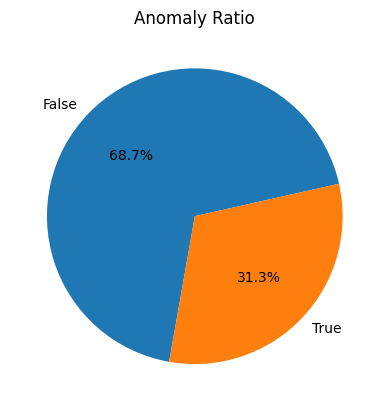

In [8]:
# Q1
anomaly = df['anomaly']
f, t = anomaly.value_counts()
f_ratio = round(f/(f+t), 3)
t_ratio = round(t/(f+t), 3)

ratio = [f_ratio, t_ratio]
labels = ['False', 'True']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Anomaly Ratio')
plt.show()

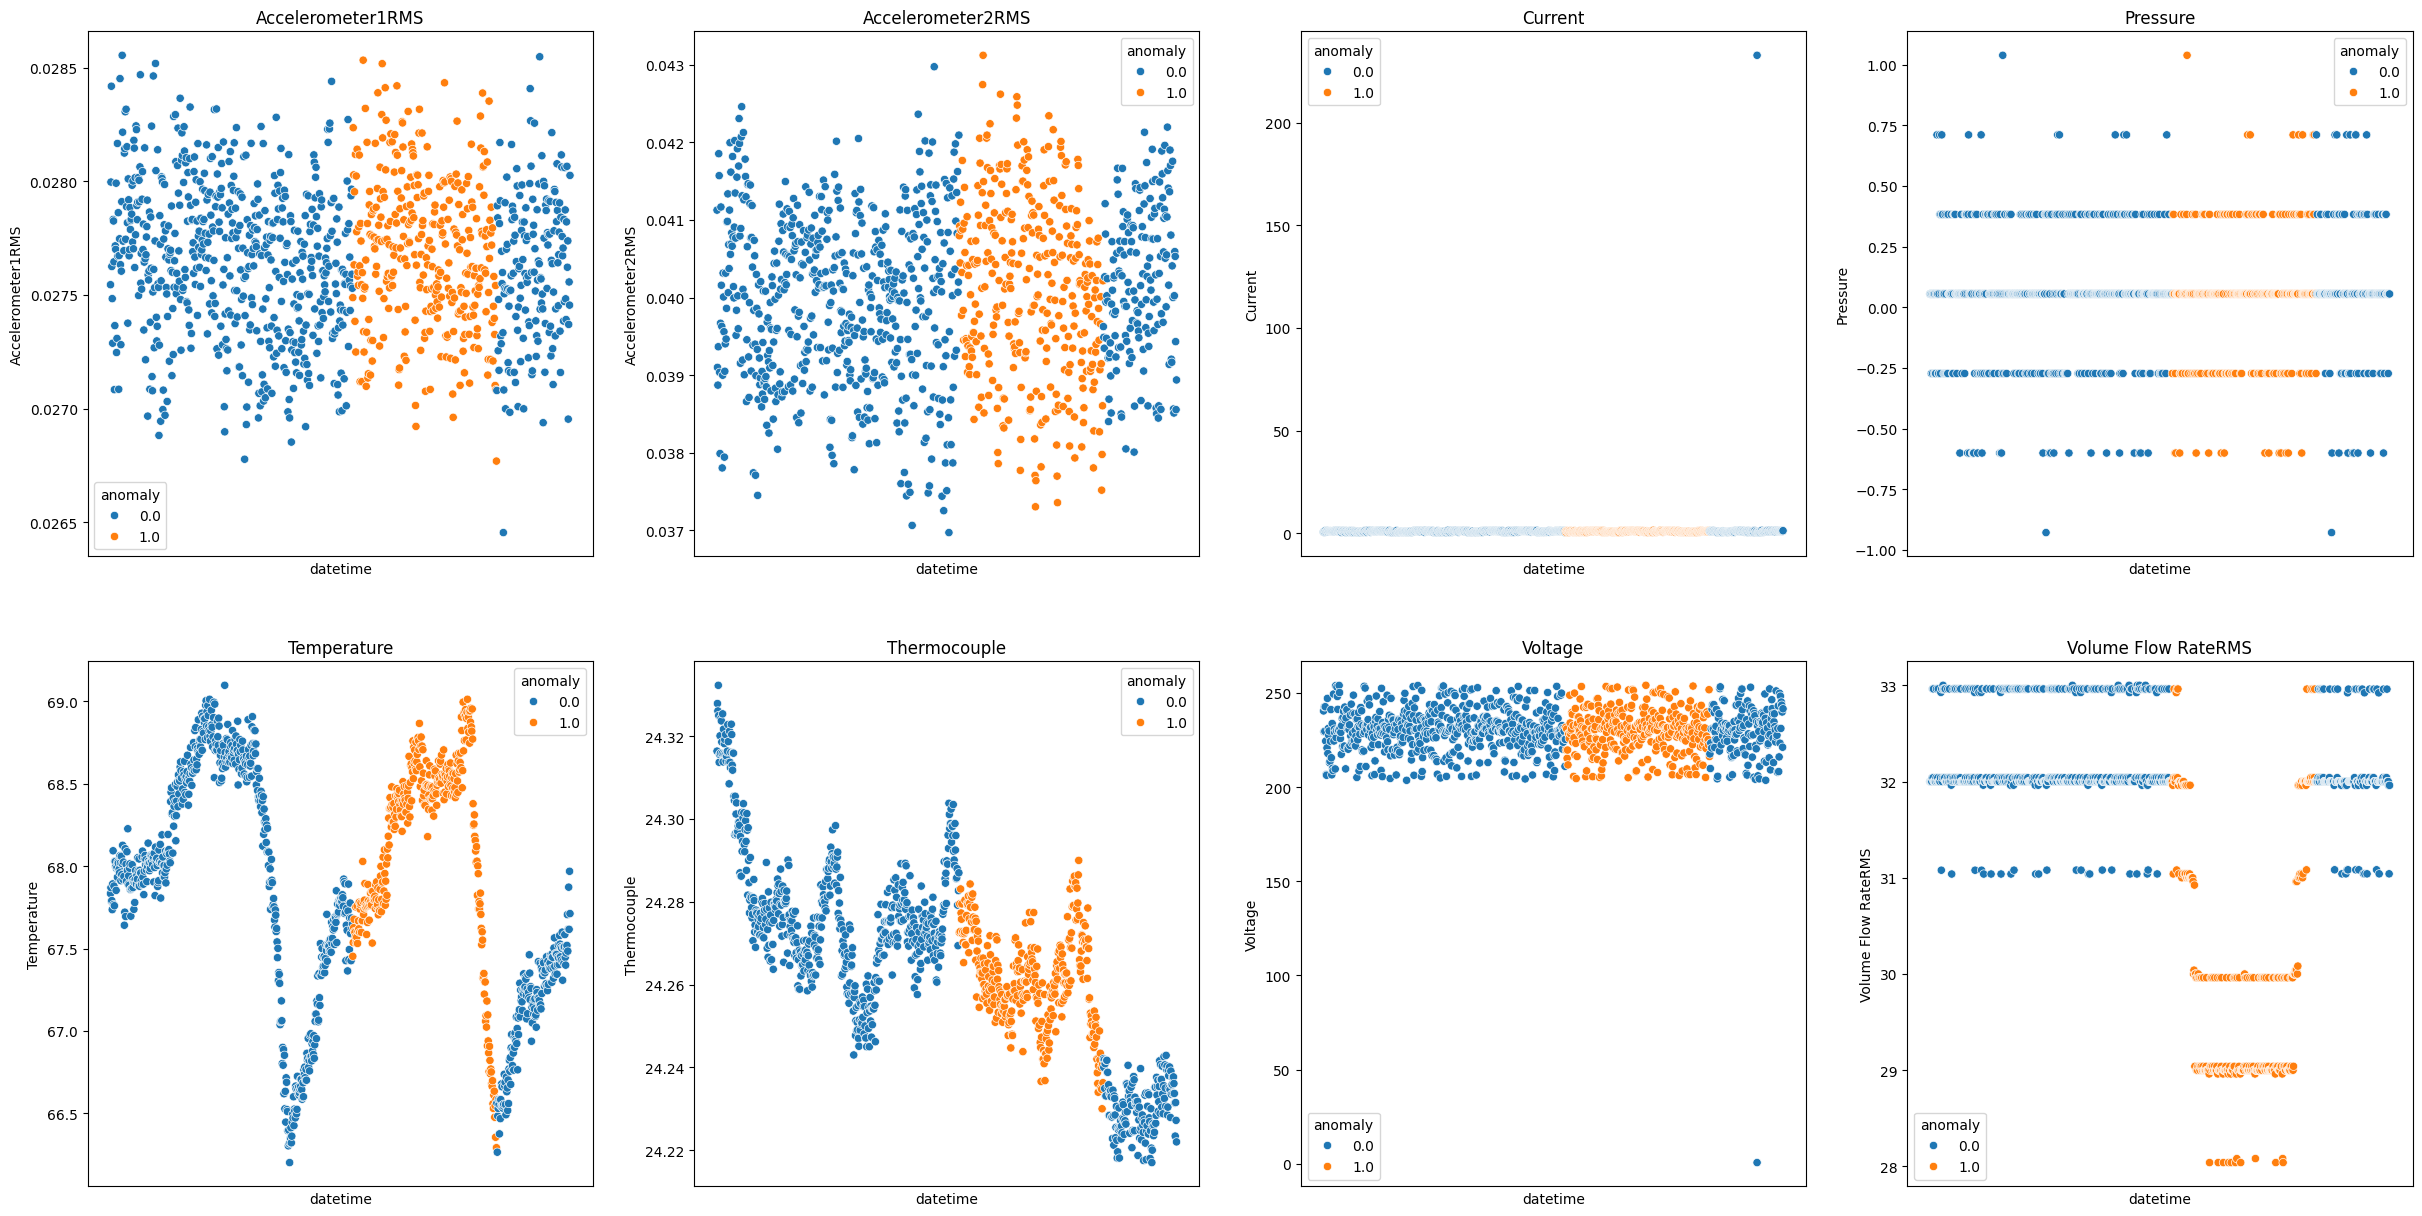

In [9]:
# Q2,3
target = ['Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS']
fig, axs = plt.subplots(2, 4, figsize=(30,15))
axs = axs.ravel()
for idx, t in enumerate(target):
    axs[idx].set_title(t)
    sns.scatterplot(data=df, x='datetime', y=t, hue='anomaly', ax=axs[idx])
    axs[idx].axes.xaxis.set_ticks([])
plt.show()

### Question 03

```
anomaly가 1인 이상 데이터와 정상 데이터의 다른 특성들이 어떤 것들이 있는지 자유롭게 추가 EDA를 진행하시오.

```

In [10]:
anomaly_df = df[df['anomaly']==1.0]
no_anomaly_df = df[df['anomaly']==0.0]

In [11]:
from scipy import stats

In [12]:
for c in df.columns:
    if not c == 'datetime':
        t, p = stats.ttest_ind(anomaly_df[c], no_anomaly_df[c], equal_var=True)
        # print(f'{c} 에대한 t-test 결과:', stats.ttest_ind(anomaly_df[c], no_anomaly_df[c], equal_var=True))
        if p > 0.05:
            print(f'p value가 너무 높습니다. 따라서 {c} 는 통계적으로 평균의 차이가 의미 없습니다.')
        else:
            print(f'{c}에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다.')

p value가 너무 높습니다. 따라서 Accelerometer1RMS 는 통계적으로 평균의 차이가 의미 없습니다.
p value가 너무 높습니다. 따라서 Accelerometer2RMS 는 통계적으로 평균의 차이가 의미 없습니다.
p value가 너무 높습니다. 따라서 Current 는 통계적으로 평균의 차이가 의미 없습니다.
p value가 너무 높습니다. 따라서 Pressure 는 통계적으로 평균의 차이가 의미 없습니다.
Temperature에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다.
Thermocouple에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다.
p value가 너무 높습니다. 따라서 Voltage 는 통계적으로 평균의 차이가 의미 없습니다.
Volume Flow RateRMS에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다.
anomaly에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다.
p value가 너무 높습니다. 따라서 changepoint 는 통계적으로 평균의 차이가 의미 없습니다.


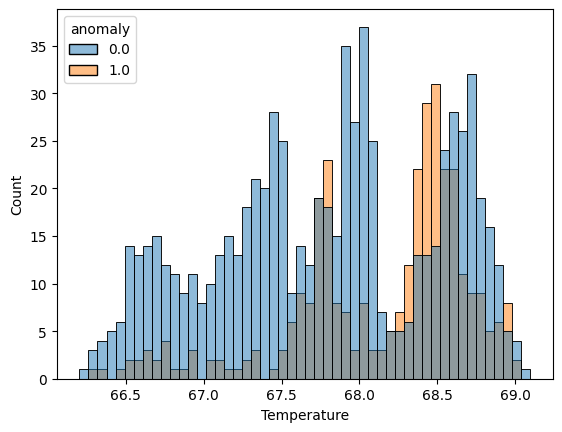

t 값은 8.271637509589327 이고, p 값은 3.9253744023397184e-16 입니다.


In [13]:
sns.histplot(data=df, x='Temperature', hue='anomaly', bins=50)
plt.show()
t, p = stats.ttest_ind(anomaly_df['Temperature'], no_anomaly_df['Temperature'], equal_var=True)
print(f't 값은 {t} 이고, p 값은 {p} 입니다.')

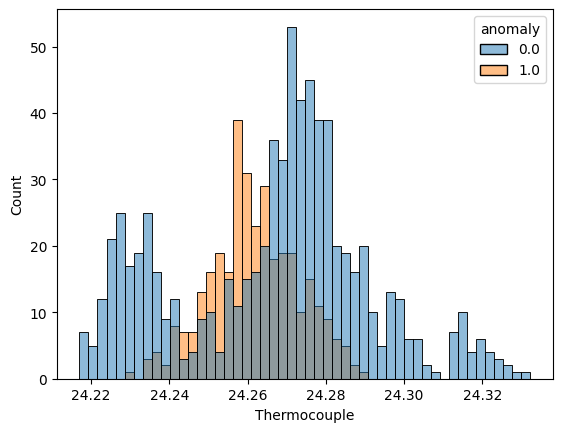

t 값은 -3.560986311349203 이고, p 값은 0.0003858474598139994 입니다.


In [14]:
sns.histplot(data=df, x='Thermocouple', hue='anomaly', bins=50)
plt.show()
t, p = stats.ttest_ind(anomaly_df['Thermocouple'], no_anomaly_df['Thermocouple'], equal_var=True)
print(f't 값은 {t} 이고, p 값은 {p} 입니다.')

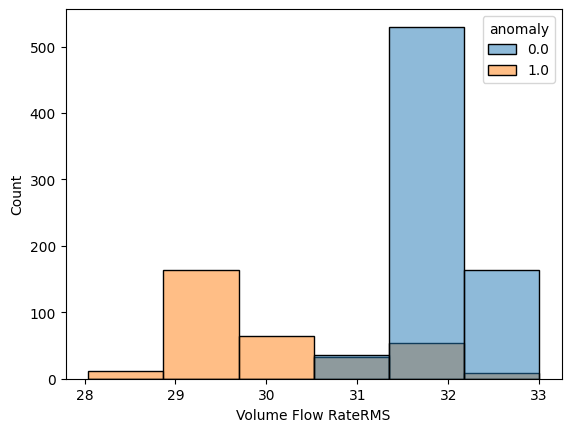

t 값은 -42.29824240280516 이고, p 값은 6.687113331872913e-230 입니다.


In [15]:
sns.histplot(data=df, x='Volume Flow RateRMS', hue='anomaly', bins=6)
plt.show()
t, p = stats.ttest_ind(anomaly_df['Volume Flow RateRMS'], no_anomaly_df['Volume Flow RateRMS'], equal_var=True)
print(f't 값은 {t} 이고, p 값은 {p} 입니다.')

### 데이터 차이
- t 검정을 통해서 이상 데이터와 그렇지 않은 데이터에 대해서 평균 차이를 비교해본 결과 Temperature, Thermocouple, Volume Flow RateRMS 컬럼에서 통계적으로 유의미한 수치의 차이가 발견됨
- 이상 데이터가 평균적으로 더 높은 Temperature를 보유하였고, Thermocouple과 Volume Flow RateRMS 에서는 더 낮은 값을 보여주었음

## **🔒 [금융] 문제**
---
* **제시된 금융 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [16]:
import pandas as pd
df = pd.read_csv('example_2.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [17]:
# Q1
print(f"전체 데이터의 Row 수는 {df.shape[0]}개 이고 Column 수는 {df.shape[1]}개 입니다.")

전체 데이터의 Row 수는 6362620개 이고 Column 수는 11개 입니다.


In [18]:
# Q2
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [19]:
# Q2
for c in df.columns:
    print(f'{c} Column의 데이터 타입은 {df[c].dtype}입니다.')

step Column의 데이터 타입은 int64입니다.
type Column의 데이터 타입은 object입니다.
amount Column의 데이터 타입은 float64입니다.
nameOrig Column의 데이터 타입은 object입니다.
oldbalanceOrg Column의 데이터 타입은 float64입니다.
newbalanceOrig Column의 데이터 타입은 float64입니다.
nameDest Column의 데이터 타입은 object입니다.
oldbalanceDest Column의 데이터 타입은 float64입니다.
newbalanceDest Column의 데이터 타입은 float64입니다.
isFraud Column의 데이터 타입은 int64입니다.
isFlaggedFraud Column의 데이터 타입은 int64입니다.


In [20]:
# Q3
for c in df.columns:
    print(f'{c} Column의 Null Value 개수는 {df[c].isnull().sum()}개 입니다.')

step Column의 Null Value 개수는 0개 입니다.
type Column의 Null Value 개수는 0개 입니다.
amount Column의 Null Value 개수는 0개 입니다.
nameOrig Column의 Null Value 개수는 0개 입니다.
oldbalanceOrg Column의 Null Value 개수는 0개 입니다.
newbalanceOrig Column의 Null Value 개수는 0개 입니다.
nameDest Column의 Null Value 개수는 0개 입니다.
oldbalanceDest Column의 Null Value 개수는 0개 입니다.
newbalanceDest Column의 Null Value 개수는 0개 입니다.
isFraud Column의 Null Value 개수는 0개 입니다.
isFlaggedFraud Column의 Null Value 개수는 0개 입니다.


### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 지표들을 추출하시오.

  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

  (2) 'type'에 따른 사기율(%)을 계산하시오.

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

```

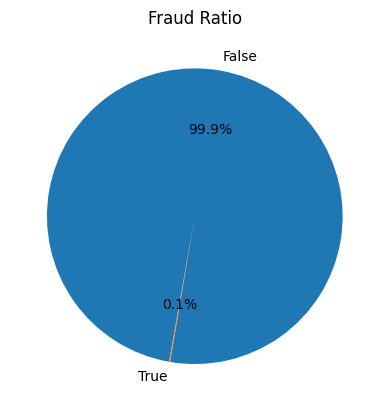

In [21]:
# Q1
fraud = df['isFraud']
f, t = fraud.value_counts()
f_ratio = round(f/(f+t), 3)
t_ratio = round(t/(f+t), 3)

ratio = [f_ratio, t_ratio]
labels = ['False', 'True']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Fraud Ratio')
plt.show()

In [89]:
# Q2
type_ls = list(df['type'].unique())
for t in type_ls:
    data = df[df['type']==t]
    fraud = data['isFraud']
    f = fraud.value_counts()[0.0]
    f_ratio = f/len(data)
    t_ratio = 1 - f_ratio
    print(f'{t} 타입의 fraud 비율은 {t_ratio:.3f}% 입니다.')    

PAYMENT 타입의 fraud 비율은 0.000% 입니다.
TRANSFER 타입의 fraud 비율은 0.008% 입니다.
CASH_OUT 타입의 fraud 비율은 0.002% 입니다.
DEBIT 타입의 fraud 비율은 0.000% 입니다.
CASH_IN 타입의 fraud 비율은 0.000% 입니다.


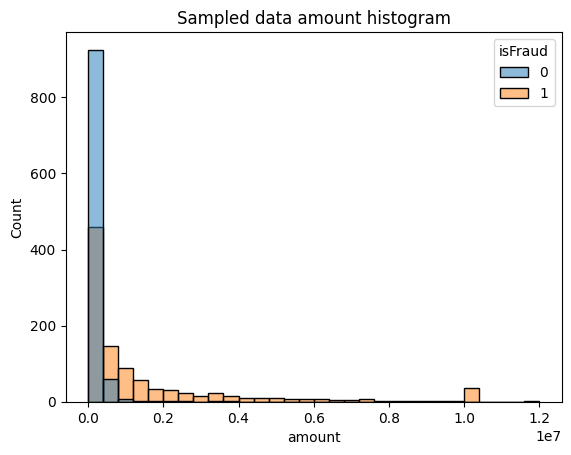

In [90]:
# Q3
fraud_data = df[df['isFraud']==1.0]
no_fraud_data = df[df['isFraud']==0.0]
fraud_sample = fraud_data.sample(1000, random_state=42)
no_fraud_sample = no_fraud_data.sample(1000, random_state=42)
total_sample = pd.concat([fraud_sample, no_fraud_sample], axis = 0)
sns.histplot(data=total_sample, x='amount', hue='isFraud', bins=30)
plt.title('Sampled data amount histogram')
plt.show()

### Question 03

```
사기거래와 정상거래의 특성을 자유롭게 추가 EDA분석 하시오.
```


In [94]:
fraud_data = df[df['isFraud']==1.0]
no_fraud_data = df[df['isFraud']==0.0]

In [95]:
df.dtypes[df.dtypes=='object']

type        object
nameOrig    object
nameDest    object
dtype: object

In [96]:
len(df) - len(df['nameOrig'].unique()) # 거의 모든 값이 유니크한 값임

9313

In [97]:
isfraud_by_dest = df.groupby('nameDest')['isFraud'].mean()

In [98]:
idx_ls = []
for i in isfraud_by_dest.index:
    if isfraud_by_dest[i] != 0:
        idx_ls.append(i)
        

In [99]:
one_ls = isfraud_by_dest[isfraud_by_dest == 1.0].index
multi_fraud = df.loc[df['nameDest'].isin(one_ls)]
duplicate_rows = multi_fraud[multi_fraud.duplicated('nameDest', keep=False)]
duplicate_rows.nameDest.unique()

array(['C1148781766', 'C1837027614', 'C14138104', 'C686334805'],
      dtype=object)

### 모든 거래가 사기에 연루된 거래 수신고객
- 'C1148781766', 'C1837027614', 'C14138104', 'C686334805' 의 거래수신자들은 모든 수신 거래가 사기에 연관되어있음

In [100]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [101]:
df.groupby('type')['isFraud'].mean()

type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64

### 사기가 발생한 거래유형
- 현재 데이터 상으로 Cash out과 Transfer에서만 사기가 적발됨
- 그 중에서 Transfer에서 더 많은 사기가 적발됨

In [115]:
for c in df.columns:
    if df[c].dtype != 'object':
        t, p = stats.ttest_ind(fraud_data[c], no_fraud_data[c], equal_var=True)
        # print(f'{c} 에대한 t-test 결과:', stats.ttest_ind(anomaly_df[c], no_anomaly_df[c], equal_var=True))
        if p > 0.05:
            print(f'p value가 너무 높습니다. 따라서 {c} 는 통계적으로 평균의 차이가 의미 없습니다. p value는 {p} 입니다.')
        else:
            print(f'{c}에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 {p} 입니다.')

step에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 0.0 입니다.
amount에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 0.0 입니다.
oldbalanceOrg에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 1.0542893553023227e-144 입니다.
newbalanceOrig에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 7.168312431103147e-94 입니다.
oldbalanceDest에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 7.463206943535623e-50 입니다.
p value가 너무 높습니다. 따라서 newbalanceDest 는 통계적으로 평균의 차이가 의미 없습니다. p value는 0.17689674407002928 입니다.
isFraud에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 0.0 입니다.
isFlaggedFraud에 대한 p value는 0.05 이하 입니다. 따라서 통계적으로 유의미한 평균차이가 존재합니다. p value는 0.0 입니다.


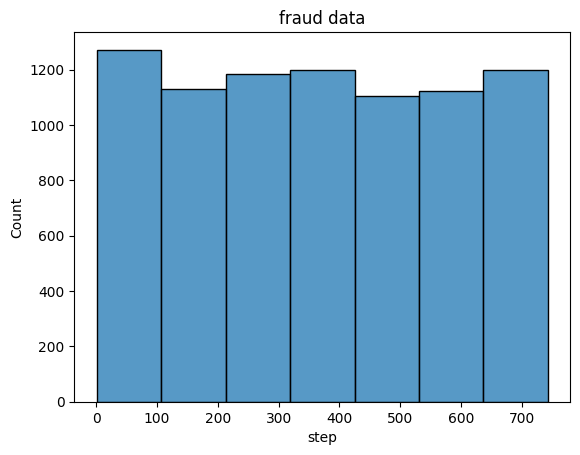

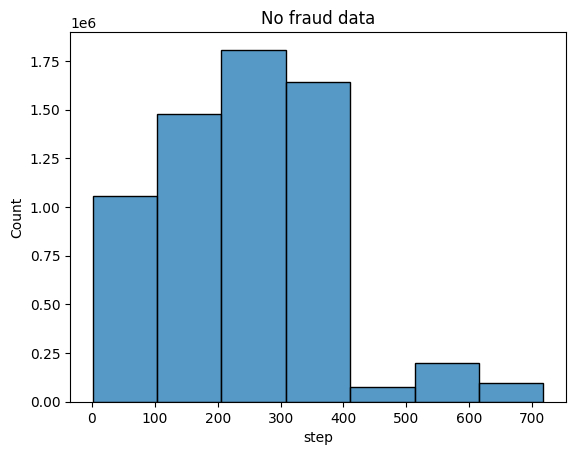

In [105]:
sns.histplot(fraud_data['step'], bins=7)
plt.title('fraud data')
plt.show()
sns.histplot(no_fraud_data['step'], bins=7)
plt.title('No fraud data')
plt.show()

In [104]:
fraud_data['step'].mean() - no_fraud_data['step'].mean()

125.17819302152336

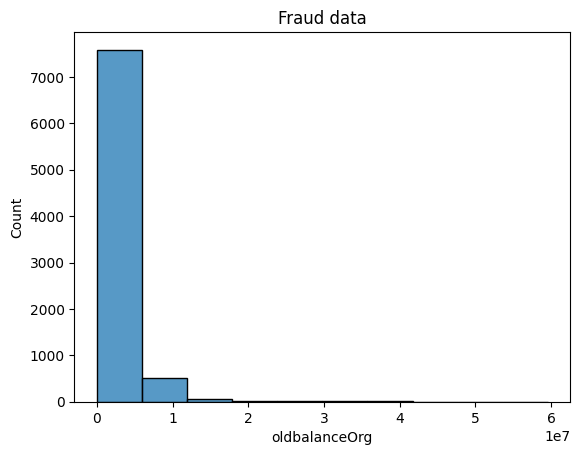

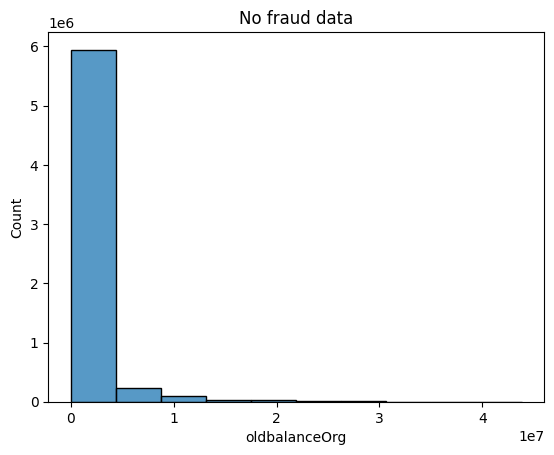

In [108]:
sns.histplot(fraud_data['oldbalanceOrg'], bins=10)
plt.title('Fraud data')
plt.show()
sns.histplot(no_fraud_data['oldbalanceOrg'], bins=10)
plt.title('No fraud data')
plt.show()

In [109]:
fraud_data['oldbalanceOrg'].mean() - no_fraud_data['oldbalanceOrg'].mean()

816838.8939844132

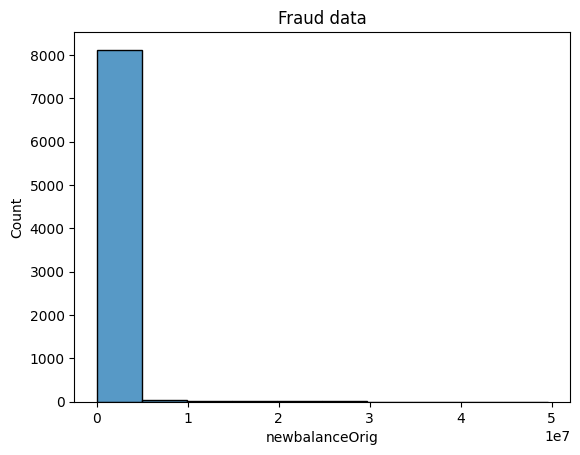

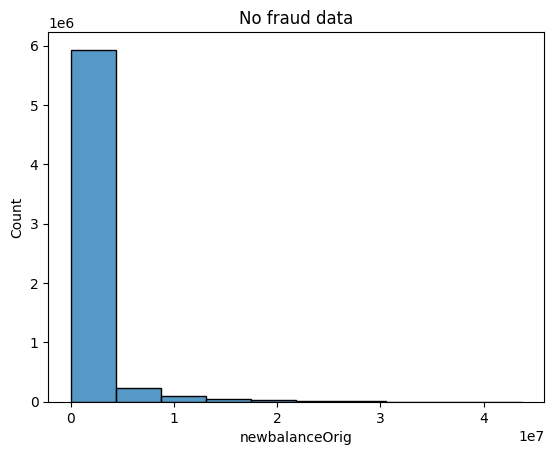

In [110]:
sns.histplot(fraud_data['newbalanceOrig'], bins=10)
plt.title('Fraud data')
plt.show()
sns.histplot(no_fraud_data['newbalanceOrig'], bins=10)
plt.title('No fraud data')
plt.show()

In [111]:
fraud_data['newbalanceOrig'].mean() - no_fraud_data['newbalanceOrig'].mean()

-663577.5962726984

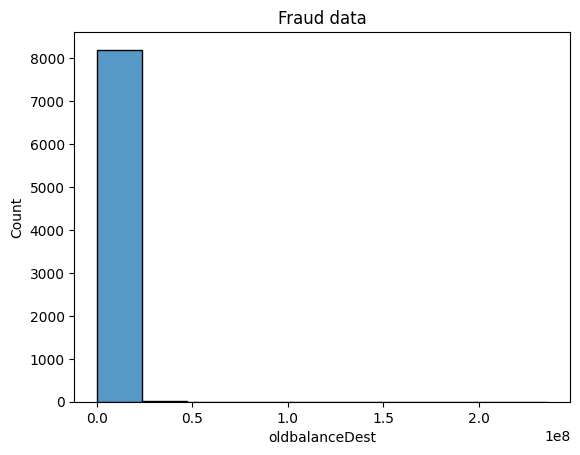

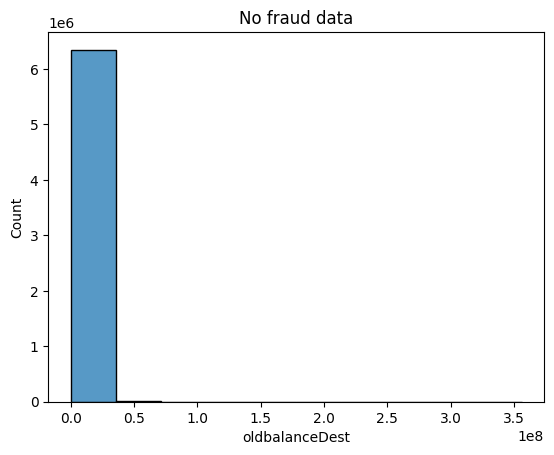

In [112]:
sns.histplot(fraud_data['oldbalanceDest'], bins=10)
plt.title('Fraud data')
plt.show()
sns.histplot(no_fraud_data['oldbalanceDest'], bins=10)
plt.title('No fraud data')
plt.show()

In [113]:
fraud_data['oldbalanceDest'].mean() - no_fraud_data['oldbalanceDest'].mean()

-557171.2554947416

### 데이터 평균 차이
- newbalanceDest에서는 통계적으로 유의미한 평균차이를 보이지 않음
- step에서는 평균에서도 통계적으로 유의미하게 차이가 있었고 분포에서도 확연한 차이가 나타남
  - 사기 거래는 모든 step이 거의 동일하게 분포되어 있는데 정상 데이터에서는 400이상이 확연히 줄어든 경향성을 보임
- 다른 데이터에서는 분포에서는 큰 차이를 보여주지 않았지만 평균에서는 통계적으로 유의미한 차이가 나타남
  - step과 oldbalanceOrg 에서는 사기 데이터의 평균이 더 높았고 다른 데이터들은 사기 데이터의 평균이 더 낮았음

## **🔒 [게임] 문제**
---
* **제시된 게임 플레이 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|ID |ID|
|groupId |매치 내에서 그룹을 식별하는 ID|
|matchId |매치를 식별하는 ID|
|assists |이 플레이어가 공격하여 팀원이 죽인 적 플레이어의 수|
|boosts |사용한 부스트 아이템의 수|
|damageDealt |총 가한 피해량|
|DBNOs |적 플레이어를 다운시킨 횟수|
|headshotKills |헤드샷킬수|
|heals |heal 아이템 사용횟수|
|killPlace |매치 내 순위(적 플레이어를 죽인 횟수에 따른)|
|killPoints |적제압포인트|
|kills |적 제압횟수|
|killStreaks |짧은 시간 내에 적 플레이어를 죽인 최대 횟수|
|longestKill |적을 죽은시점에서 나와 죽은적의 거리(다운 시킨 후 차량으로 이동한 경우 큰 데이터가 발생할 수 있음|
|maxPlace |최악의 순위|
|numGroups |그룹넘버|
|revives |팀원을 부활시킨 횟수|
|rideDistance |이동수단 타고 이동거리|
|roadKills |차량 내에서 이루어진 적 제압횟수|
|swimDistance|수영한거리|
|teamKills |같은 팀원을 제압한 횟수|
|vehicleDestroys|자동차 파괴횟수|
|walkDistance|도보이동거리|
|weaponsAcquired|무기 획득횟수|
|winPoints|승점|
|winPlacePerc|승률|


In [2]:
import pandas as pd
df = pd.read_csv('example_3.csv', index_col=0)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [3]:
# Q1
print(f"전체 데이터의 Row 수는 {df.shape[0]}개 이고 Column 수는 {df.shape[1]}개 입니다.")

전체 데이터의 Row 수는 6225249개 이고 Column 수는 26개 입니다.


In [4]:
# Q2
print(df.dtypes)

Id                   int64
groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object


In [5]:
# Q2
for c in df.columns:
    print(f'{c} Column의 데이터 타입은 {df[c].dtype}입니다.')

Id Column의 데이터 타입은 int64입니다.
groupId Column의 데이터 타입은 int64입니다.
matchId Column의 데이터 타입은 int64입니다.
assists Column의 데이터 타입은 int64입니다.
boosts Column의 데이터 타입은 int64입니다.
damageDealt Column의 데이터 타입은 float64입니다.
DBNOs Column의 데이터 타입은 int64입니다.
headshotKills Column의 데이터 타입은 int64입니다.
heals Column의 데이터 타입은 int64입니다.
killPlace Column의 데이터 타입은 int64입니다.
killPoints Column의 데이터 타입은 int64입니다.
kills Column의 데이터 타입은 int64입니다.
killStreaks Column의 데이터 타입은 int64입니다.
longestKill Column의 데이터 타입은 float64입니다.
maxPlace Column의 데이터 타입은 int64입니다.
numGroups Column의 데이터 타입은 int64입니다.
revives Column의 데이터 타입은 int64입니다.
rideDistance Column의 데이터 타입은 float64입니다.
roadKills Column의 데이터 타입은 int64입니다.
swimDistance Column의 데이터 타입은 float64입니다.
teamKills Column의 데이터 타입은 int64입니다.
vehicleDestroys Column의 데이터 타입은 int64입니다.
walkDistance Column의 데이터 타입은 float64입니다.
weaponsAcquired Column의 데이터 타입은 int64입니다.
winPoints Column의 데이터 타입은 int64입니다.
winPlacePerc Column의 데이터 타입은 float64입니다.


In [6]:
# Q3
for c in df.columns:
    print(f'{c} Column의 Null Value 개수는 {df[c].isnull().sum()}개 입니다.')

Id Column의 Null Value 개수는 0개 입니다.
groupId Column의 Null Value 개수는 0개 입니다.
matchId Column의 Null Value 개수는 0개 입니다.
assists Column의 Null Value 개수는 0개 입니다.
boosts Column의 Null Value 개수는 0개 입니다.
damageDealt Column의 Null Value 개수는 0개 입니다.
DBNOs Column의 Null Value 개수는 0개 입니다.
headshotKills Column의 Null Value 개수는 0개 입니다.
heals Column의 Null Value 개수는 0개 입니다.
killPlace Column의 Null Value 개수는 0개 입니다.
killPoints Column의 Null Value 개수는 0개 입니다.
kills Column의 Null Value 개수는 0개 입니다.
killStreaks Column의 Null Value 개수는 0개 입니다.
longestKill Column의 Null Value 개수는 0개 입니다.
maxPlace Column의 Null Value 개수는 0개 입니다.
numGroups Column의 Null Value 개수는 0개 입니다.
revives Column의 Null Value 개수는 0개 입니다.
rideDistance Column의 Null Value 개수는 0개 입니다.
roadKills Column의 Null Value 개수는 0개 입니다.
swimDistance Column의 Null Value 개수는 0개 입니다.
teamKills Column의 Null Value 개수는 0개 입니다.
vehicleDestroys Column의 Null Value 개수는 0개 입니다.
walkDistance Column의 Null Value 개수는 0개 입니다.
weaponsAcquired Column의 Null Value 개수는 0개 입니다.
winPoints Colum

### Question 02

```
다음 가설들을 데이터 분석을 통해 검증하시오.

[가설]
Without moving & WeaponsAcquired - analyze
 : 이동 없이 무기를 획득한 버그 유저가 존재할까?

  (1) _totalDistance가 하위 10%인 Data set을 만드시오.
  (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

  (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

```

In [7]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

In [8]:
data = df[df['totalDistance'] < df['totalDistance'].quantile(0.1)]

In [9]:
sus_data = data[data['weaponsAcquired'] > data['weaponsAcquired'].quantile(0.99)]

In [10]:
print(f'버그 의심 유저의 수는 {sus_data.shape[0]}명 입니다.')

버그 의심 유저의 수는 5275명 입니다.


### Question 03

```
상위 가설 이외에 주어진 데이터를 활용하여 다른 Action을 하는 버그 유저들을 식별하시오.
```

In [11]:
df['killStreaks'].unique()

array([ 1,  0,  2,  4,  3,  5,  6,  9,  7,  8, 12, 10, 13, 11, 14, 19])

In [12]:
df['damageDealt'].max()

6384.0

### 많은 데미지를 입히면서 치유 아이템을 쓰지 않은 유저가 있는가?

In [23]:
df[(df['damageDealt']>=df['damageDealt'].quantile(0.99)) & (df['heals']==0)].sort_values('damageDealt', ascending=False)[['Id', 'maxPlace', 'totalDistance', 'damageDealt', 'kills']]

,Id,maxPlace,totalDistance,damageDealt,kills
910050,1297658,8,2384.00,6384.0,60
74095,94553,24,2171.00,4222.0,48
722495,1028911,18,408.10,3534.0,33
34674,34674,9,180.80,3306.0,33
671890,957968,6,560.40,3302.0,32
...,...,...,...,...,...
1497926,5008323,99,5557.00,775.7,7
98223,336888,4,43.17,775.7,7
2550242,3641982,48,4676.00,775.7,6
1548050,2198634,49,3321.92,775.7,5


### 데미지누수 없이 모든 데미지가 연속적인 킬로 이어진 유저가 있는가?

In [28]:
streak_df = df[(df['kills']*100 == df['damageDealt']) & (df['killStreaks'] >= 10)]

In [29]:
streak_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
333116,455859,1615903,46724,0,0,1900.0,14,13,0,1,...,665.8,0,66.59,0,0,1759.0,0,1521,0.9643,2491.39
61201,204401,2553001,68021,0,1,1900.0,0,17,0,1,...,1906.0,0,0.00,0,0,1195.0,8,1444,NaN,3101.00
